# How to use Categorical Variables in Linear Regression and Random Forest Models

## One Hot Encoding of Categorical Variables (Use in Multiple Linear Regression)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Simulate a small data frame with 100 records
np.random.seed(42)
data = pd.DataFrame({
    'price': np.random.randint(1000, 5000, 100),
    'breed': np.random.choice(['Labrador', 'Poodle', 'Bulldog'], 100),
    'height': np.random.randint(10, 30, 100)
})

# One-Hot-Encoding of column 'breed'
df = pd.get_dummies(data, columns=['breed'])

# Split data into features and target
X = df.drop('price', axis=1)
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Convert boolean columns to integers
X_train = X_train.astype(int)

# Add constant to the model
X_train_const = sm.add_constant(X_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

ModuleNotFoundError: No module named 'statsmodels'

## Factorization of Categorical Variables (Use in Random Forest Regression)

Training R^2 score: 0.5323
Testing R^2 score: 0.0861


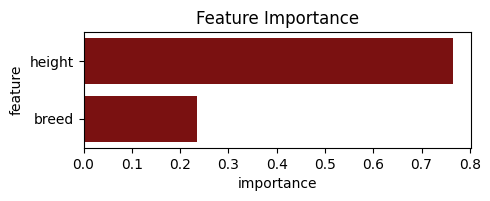

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Simulate a small data frame with 100 records
np.random.seed(42)
data = pd.DataFrame({
    'price': np.random.randint(1000, 5000, 100),
    'breed': np.random.choice(['Labrador', 'Poodle', 'Bulldog'], 100),
    'height': np.random.randint(10, 30, 100)
})

# Encode 'breed' column to numeric values
data['breed'] = pd.factorize(data['breed'])[0]

# Split data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the model
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)
print(f"Training R^2 score: {train_score:.4f}")
print(f"Testing R^2 score: {test_score:.4f}")

# Show feateure importance as bar chart
feature_importances = rf.feature_importances_
feature_names = X.columns
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})
feature_importances_df = feature_importances_df.sort_values('importance', 
                                                            ascending=False)

plt.figure(figsize=(5, 1.5))
sns.barplot(x='importance', 
            y='feature', 
            data=feature_importances_df, 
            color='darkred')
plt.title('Feature Importance')
plt.show()
